# TASK

# WEB SCRAPING

In [56]:
# Importing BeautifulSoup Library for pulling data out of HTML files.

from bs4 import BeautifulSoup
import requests

In [57]:
# Specifing the URL of the webpage to be scraped
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_India'

# Using the HTML parser to analyse the HTML content retrieved from the webpage
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html')

In [58]:
# Accessing the table from the HTML code
table = soup.find_all('table', class_ = 'wikitable sortable')[1]

In [59]:
# Finding the column headers using the 'th' tag
table_titles = table.find_all('th')
table_titles

[<th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Revenue<br/><small>(in  <b>₹ Crore</b>)</small>
 </th>,
 <th>Revenue growth
 </th>,
 <th>Profits<br/><small>(in  <b>₹ Crore</b>)</small>
 </th>,
 <th>Headquarters
 </th>,
 <th><a href="/wiki/List_of_public_sector_undertakings_in_India" title="List of public sector undertakings in India">State Controlled</a>
 </th>]

In [60]:
# Extracting the text from the list of elements 
table_headers = [title.text.strip() for title in table_titles]
print(table_headers)

['Rank', 'Name', 'Industry', 'Revenue(in  ₹ Crore)', 'Revenue growth', 'Profits(in  ₹ Crore)', 'Headquarters', 'State Controlled']


In [61]:
# Importing Pandas and creating a dataframe 
import pandas as pd 
df = pd.DataFrame(columns = table_headers)
df

,Rank,Name,Industry,Revenue(in ₹ Crore),Revenue growth,Profits(in ₹ Crore),Headquarters,State Controlled


In [62]:
# Extracting the text content from each cell of the row and appending the data to the dataframe
column_data = table.find_all('tr')
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [title.text.strip() for title in row_data]
    length = len(df)
    df.loc[length] = individual_row_data
df

,Rank,Name,Industry,Revenue(in ₹ Crore),Revenue growth,Profits(in ₹ Crore),Headquarters,State Controlled
0,1,Indian Oil Corporation,Oil and gas,"424,321",13.2%,"22,189",New Delhi,Yes
1,2,Reliance Industries Limited,Oil and gas,"410,295",28.2%,"36,075",Mumbai,
2,3,Oil and Natural Gas Corporation,Oil and gas,"333,143",11.0%,"22,106",New Delhi,Yes
3,4,State Bank of India,Banking,"306,528",2.6%,"−4,556",Mumbai,Yes
4,5,Tata Motors,Automotive,"301,175",7.9%,"8,989",Mumbai,
5,6,Bharat Petroleum,Oil and gas,"238,638",13.7%,"9,009",Mumbai,Yes
6,7,Hindustan Petroleum,Oil and gas,"221,693",13.4%,"7,218",Mumbai,Yes
7,8,Rajesh Exports,Gems and jewellery,"187,748",22.5%,"1,266",Bangalore,
8,9,Tata Steel,Iron and steel,"147,192",25.3%,"13,434",Mumbai,
9,10,Coal India,Metals and mining,"132,897",5.3%,"7,020",Kolkata,Yes


# DATA CLEANING

In [63]:
# Renaming the Revenue growth column to Revenue growth %
df.rename(columns={'Revenue growth': 'Revenue growth %'}, inplace=True)
df

,Rank,Name,Industry,Revenue(in ₹ Crore),Revenue growth %,Profits(in ₹ Crore),Headquarters,State Controlled
0,1,Indian Oil Corporation,Oil and gas,"424,321",13.2%,"22,189",New Delhi,Yes
1,2,Reliance Industries Limited,Oil and gas,"410,295",28.2%,"36,075",Mumbai,
2,3,Oil and Natural Gas Corporation,Oil and gas,"333,143",11.0%,"22,106",New Delhi,Yes
3,4,State Bank of India,Banking,"306,528",2.6%,"−4,556",Mumbai,Yes
4,5,Tata Motors,Automotive,"301,175",7.9%,"8,989",Mumbai,
5,6,Bharat Petroleum,Oil and gas,"238,638",13.7%,"9,009",Mumbai,Yes
6,7,Hindustan Petroleum,Oil and gas,"221,693",13.4%,"7,218",Mumbai,Yes
7,8,Rajesh Exports,Gems and jewellery,"187,748",22.5%,"1,266",Bangalore,
8,9,Tata Steel,Iron and steel,"147,192",25.3%,"13,434",Mumbai,
9,10,Coal India,Metals and mining,"132,897",5.3%,"7,020",Kolkata,Yes


In [64]:
#Removing the '%' symbol from the Revenue Growth % column values and then converting them to floating-point numbers
df['Revenue growth %'] = df['Revenue growth %'].str.replace('%', '').astype(float)
df

,Rank,Name,Industry,Revenue(in ₹ Crore),Revenue growth %,Profits(in ₹ Crore),Headquarters,State Controlled
0,1,Indian Oil Corporation,Oil and gas,"424,321",13.2,"22,189",New Delhi,Yes
1,2,Reliance Industries Limited,Oil and gas,"410,295",28.2,"36,075",Mumbai,
2,3,Oil and Natural Gas Corporation,Oil and gas,"333,143",11.0,"22,106",New Delhi,Yes
3,4,State Bank of India,Banking,"306,528",2.6,"−4,556",Mumbai,Yes
4,5,Tata Motors,Automotive,"301,175",7.9,"8,989",Mumbai,
5,6,Bharat Petroleum,Oil and gas,"238,638",13.7,"9,009",Mumbai,Yes
6,7,Hindustan Petroleum,Oil and gas,"221,693",13.4,"7,218",Mumbai,Yes
7,8,Rajesh Exports,Gems and jewellery,"187,748",22.5,"1,266",Bangalore,
8,9,Tata Steel,Iron and steel,"147,192",25.3,"13,434",Mumbai,
9,10,Coal India,Metals and mining,"132,897",5.3,"7,020",Kolkata,Yes


In [65]:
# Replacing the white spaces in the column State Controlled with appropriate text
df['State Controlled'] = df['State Controlled'].replace(r'^\s*$', 'No', regex=True)
df

,Rank,Name,Industry,Revenue(in ₹ Crore),Revenue growth %,Profits(in ₹ Crore),Headquarters,State Controlled
0,1,Indian Oil Corporation,Oil and gas,"424,321",13.2,"22,189",New Delhi,Yes
1,2,Reliance Industries Limited,Oil and gas,"410,295",28.2,"36,075",Mumbai,No
2,3,Oil and Natural Gas Corporation,Oil and gas,"333,143",11.0,"22,106",New Delhi,Yes
3,4,State Bank of India,Banking,"306,528",2.6,"−4,556",Mumbai,Yes
4,5,Tata Motors,Automotive,"301,175",7.9,"8,989",Mumbai,No
5,6,Bharat Petroleum,Oil and gas,"238,638",13.7,"9,009",Mumbai,Yes
6,7,Hindustan Petroleum,Oil and gas,"221,693",13.4,"7,218",Mumbai,Yes
7,8,Rajesh Exports,Gems and jewellery,"187,748",22.5,"1,266",Bangalore,No
8,9,Tata Steel,Iron and steel,"147,192",25.3,"13,434",Mumbai,No
9,10,Coal India,Metals and mining,"132,897",5.3,"7,020",Kolkata,Yes


In [66]:
# Removing comma from the strings and then converting them to floating-point numbers
df['Revenue(in  ₹ Crore)'] = df['Revenue(in  ₹ Crore)'].astype(str).str.replace(',', '').astype(float)

In [67]:
# Replacing non-standard minus signs ('−') with standard hyphens ('-') in the 'Profits (in ₹ Crore)' column
df['Profits(in  ₹ Crore)'] = df['Profits(in  ₹ Crore)'].str.replace('−', '-')

# Removing comma from the strings and then converting them to floating-point numbers
df['Profits(in  ₹ Crore)'] = df['Profits(in  ₹ Crore)'].astype(str).str.replace(',', '').astype(float)

In [68]:
# Final Dataframe 
df

,Rank,Name,Industry,Revenue(in ₹ Crore),Revenue growth %,Profits(in ₹ Crore),Headquarters,State Controlled
0,1,Indian Oil Corporation,Oil and gas,424321.0,13.2,22189.0,New Delhi,Yes
1,2,Reliance Industries Limited,Oil and gas,410295.0,28.2,36075.0,Mumbai,No
2,3,Oil and Natural Gas Corporation,Oil and gas,333143.0,11.0,22106.0,New Delhi,Yes
3,4,State Bank of India,Banking,306528.0,2.6,-4556.0,Mumbai,Yes
4,5,Tata Motors,Automotive,301175.0,7.9,8989.0,Mumbai,No
5,6,Bharat Petroleum,Oil and gas,238638.0,13.7,9009.0,Mumbai,Yes
6,7,Hindustan Petroleum,Oil and gas,221693.0,13.4,7218.0,Mumbai,Yes
7,8,Rajesh Exports,Gems and jewellery,187748.0,22.5,1266.0,Bangalore,No
8,9,Tata Steel,Iron and steel,147192.0,25.3,13434.0,Mumbai,No
9,10,Coal India,Metals and mining,132897.0,5.3,7020.0,Kolkata,Yes


# DATA ANALYSIS

In [69]:
# QUERY 1 : List out the companies from the Oil and Gas sector

oil_gas_companies = df[df['Industry'] == 'Oil and gas']
columns = ['Name', 'Revenue growth %', 'Profits(in  ₹ Crore)', 'Headquarters', 'State Controlled']
print(oil_gas_companies[columns].to_string(index=False, col_space=23))

                           Name        Revenue growth %    Profits(in  ₹ Crore)            Headquarters        State Controlled
         Indian Oil Corporation                    13.2                 22189.0               New Delhi                     Yes
    Reliance Industries Limited                    28.2                 36075.0                  Mumbai                      No
Oil and Natural Gas Corporation                    11.0                 22106.0               New Delhi                     Yes
               Bharat Petroleum                    13.7                  9009.0                  Mumbai                     Yes
            Hindustan Petroleum                    13.4                  7218.0                  Mumbai                     Yes
                  Nayara Energy                    10.7                   576.0                  Mumbai                      No
                           GAIL                    11.6                  4799.0               New Delhi 

In [70]:
# QUERY 2 : List out the companies with the highest revenue growth, highest revenue and highest profit

max_revenue_growth = df['Revenue growth %'].max()
company_max_revenue_growth = df.loc[df['Revenue growth %'].idxmax()]['Name']
print("Highest Revenue Growth: ",company_max_revenue_growth,"-",max_revenue_growth,"%")
print("\n")

max_revenue = df['Revenue(in  ₹ Crore)'].max()
company_max_revenue = df.loc[df['Revenue(in  ₹ Crore)'].idxmax()]['Name']
print("Highest Revenue: ",company_max_revenue,"-",max_revenue,"Crores")
print("\n")

max_profits = df['Profits(in  ₹ Crore)'].max()
company_max_profits = df.loc[df['Profits(in  ₹ Crore)'].idxmax()]['Name']
print("Highest Profit: ",company_max_profits,"-",max_profits,"Crores")

Highest Revenue Growth:  Grasim Industries - 54.9 %


Highest Revenue:  Indian Oil Corporation - 424321.0 Crores


Highest Profit:  Reliance Industries Limited - 36075.0 Crores


In [71]:
#QUERY 3 : List out the companies that are not state controlled and located in mumbai

scm_companies = df[(df['State Controlled'] == 'No') & (df['Headquarters'] == 'Mumbai')].copy()
scm_companies['Profit %'] = (scm_companies['Profits(in  ₹ Crore)'] / scm_companies['Revenue(in  ₹ Crore)']) * 100
scm_companies['Profit %'] = scm_companies['Profit %'].round(2)
columns = ['Name', 'Revenue(in  ₹ Crore)', 'Revenue growth %', 'Profit %']
print(scm_companies[columns].to_string(index=False, col_space=23))

                       Name    Revenue(in  ₹ Crore)        Revenue growth %                Profit %
Reliance Industries Limited                410295.0                    28.2                    8.79
                Tata Motors                301175.0                     7.9                    2.98
                 Tata Steel                147192.0                    25.3                    9.13
  Tata Consultancy Services                126745.0                     3.6                   20.38
            Larsen & Toubro                122743.0                    10.6                    6.00
        Hindalco Industries                120428.0                    15.5                    5.05
                 ICICI Bank                118969.0                     4.9                    6.48
                  HDFC Bank                101344.0                    17.6                   18.26
        Mahindra & Mahindra                 96377.0                    12.2                    7.79


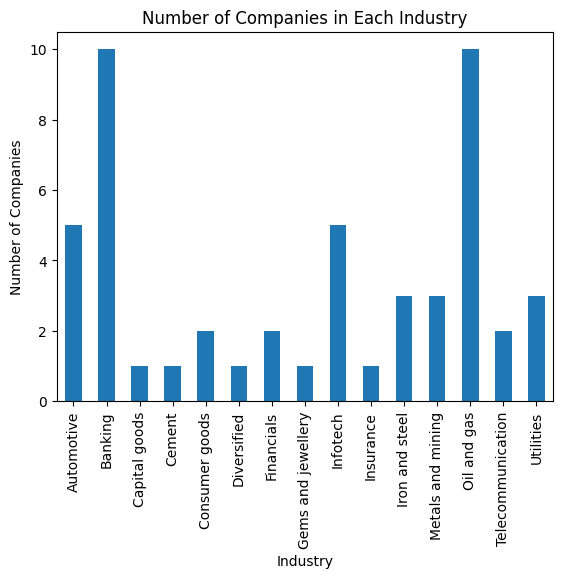

In [72]:
#QUERY 4 : Plot a bar chart depicting the number of companies in each industry

import matplotlib.pyplot as plt

industry_count = df.groupby('Industry').size()

industry_count.plot(kind ='bar')
plt.xlabel('Industry')
plt.ylabel('Number of Companies')
plt.title('Number of Companies in Each Industry')
plt.show()

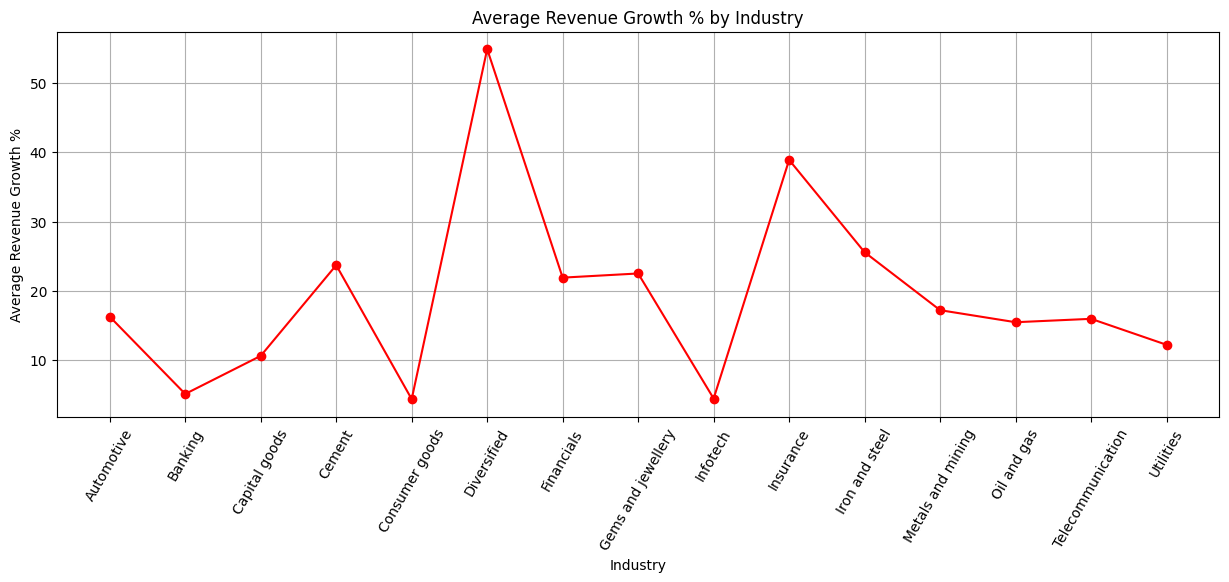

In [73]:
#QUERY 5 : Plot a line chart depicting the average revenue growth of each industry

average_growth = df.groupby('Industry')['Revenue growth %'].mean()

plt.figure(figsize=(15, 5))
average_growth.plot(kind='line', marker='o', color='r')
plt.title('Average Revenue Growth % by Industry')
plt.xlabel('Industry')
plt.ylabel('Average Revenue Growth %')
plt.xticks(range(len(average_growth.index)), average_growth.index, rotation=60)
plt.grid(True)
plt.show()